In [1]:
import numpy as np
from lsst.sims.almanac import Almanac
import matplotlib.pylab as plt
import pandas as pd
import sqlite3
from utils import Constellation, starlink_constellation
import sys

import healpy as hp
%matplotlib inline
from lsst.sims.utils import _raDec2Hpid

In [2]:
sat_tles = starlink_constellation()
constellation = Constellation(sat_tles)

In [3]:
mjd_start = 59853.00318887
step=1./3600/24.
length = 10./60/24.
#mjd_start += length
mjds = np.arange(mjd_start, mjd_start+length+step, step)

In [4]:
nside = 32
result = np.zeros(hp.nside2npix(nside))

In [5]:
for mjd in mjds:
    constellation.update_mjd(mjd)
    above = constellation.above_alt_limit
    hpids = _raDec2Hpid(nside, constellation.azimuth_rad[above], constellation.altitudes_rad[above])
    result[hpids] += 1

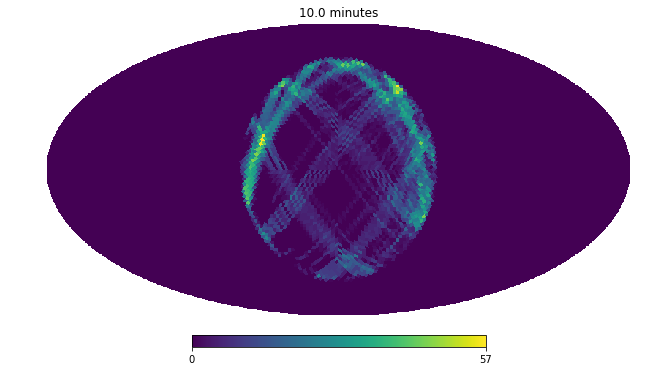

In [6]:

hp.mollview(result, rot=(0,90,0), title='%.1f minutes' % (length*60*24))

# Note, this is just healpixels that get hit! Need to convolve with 3.5 deg FoV to make sure we don't have any hits.